In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import hmmlearn.hmm as hmm

In [3]:
np.random.seed(13)

## 3.4

In [4]:
data = np.load("rolls.npy")

In [5]:
data.shape

(50000, 1)

In [8]:
train, val = train_test_split(data, test_size=0.5, shuffle=False)

In [16]:
# Used ChatGPT

initial_state = [1.0, 0.0]
fair_prob = [1/6 for _ in range(6)]

# Generate emission probabilities
loaded_emission_probs = [np.random.dirichlet(np.ones(6)/2) for _ in range(50)]

best_model = None
best_score = float('-inf')
scores = []

for emission_prob in loaded_emission_probs:
    loaded_emission_prob_normalized = np.array(emission_prob) / np.sum(emission_prob)

    # Initialize the HMM
    model = hmm.CategoricalHMM(n_components=2, init_params="", params="t", random_state=13)
    model.startprob_ = initial_state
    model.transmat_ = np.array([np.random.dirichlet([0.9, 0.1]),
                                np.random.dirichlet([0.1, 0.9])])
    model.emissionprob_ = np.array([fair_prob, loaded_emission_prob_normalized])

    # Fit the model
    model.fit(train.reshape(-1, 1))
    score = model.score(val.reshape(-1, 1))
    scores.append(score)

    # Update the best model
    if score > best_score:
        best_score = score
        best_model = model

In [17]:
print("Emission Probabilities:")
best_emission_prob = best_model.emissionprob_
print(best_emission_prob[1])

Emission Probabilities:
[1.92629711e-01 1.72377280e-04 1.65996552e-01 1.99835835e-02
 6.69130177e-03 6.14526474e-01]


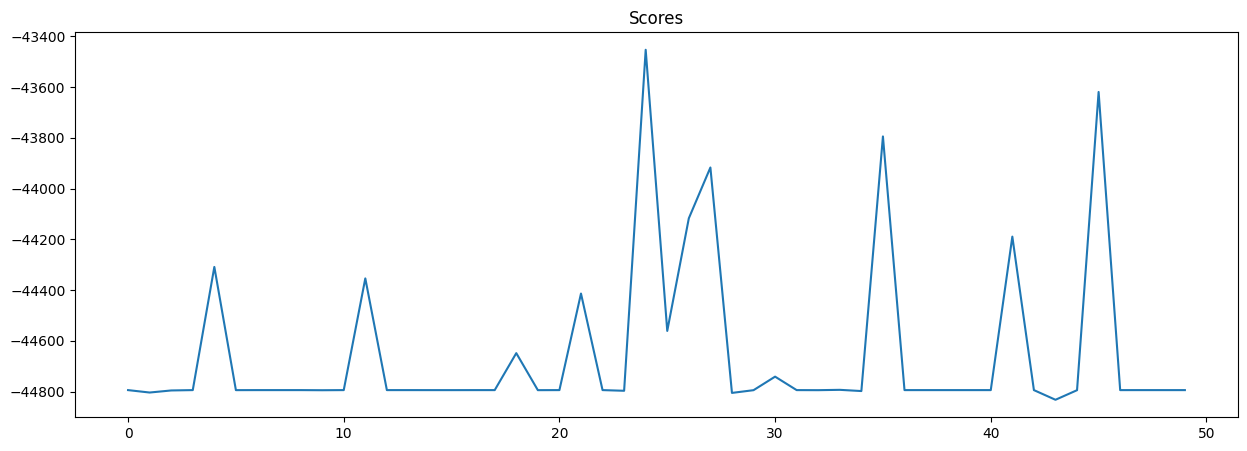

In [18]:
# Plot the scores
plt.figure(figsize=(15, 5))
plt.plot(scores)
plt.title('Scores')
plt.show()

In [19]:
predicted_states = best_model.predict(val.reshape(-1, 1))

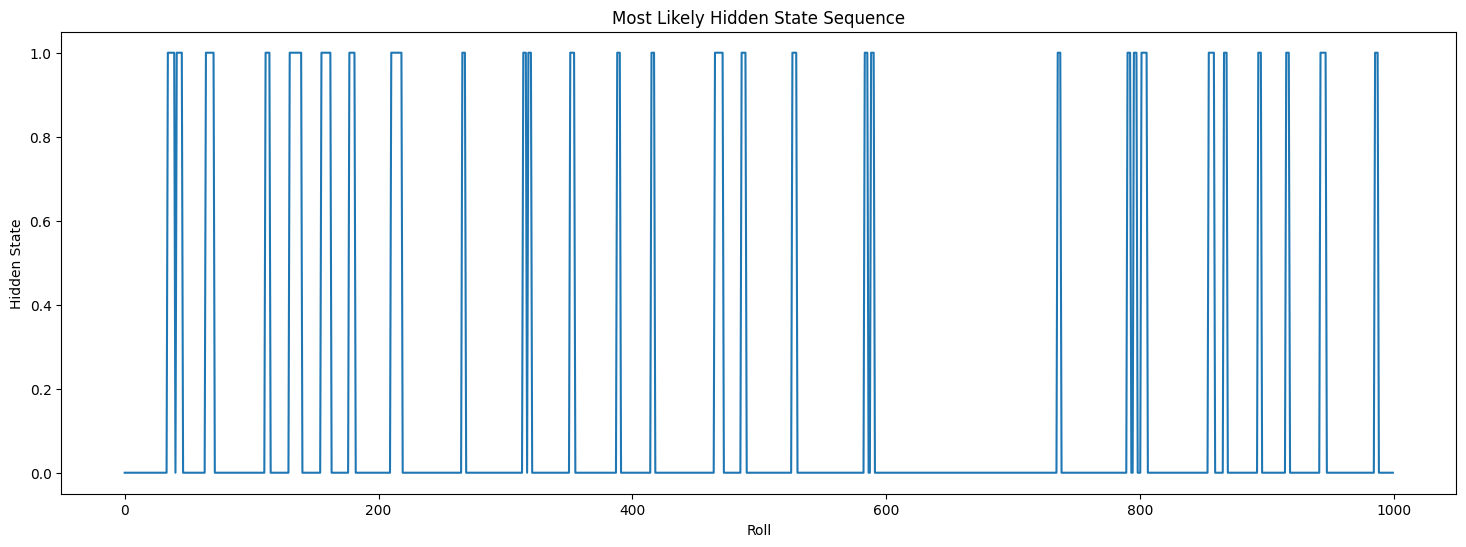

In [20]:
plt.figure(figsize=(18, 6))
plt.plot(np.arange(1000), predicted_states[:1000])
plt.title('Most Likely Hidden State Sequence')
plt.xlabel('Roll')
plt.ylabel('Hidden State')
plt.show()


This corresponds to the decoding problem in HMMs becuase involve finding the most likely sequence of states given the observed data and visualizing these states.

In [21]:
switches_fair_to_loaded = sum(predicted_states[i-1] == 0 and predicted_states[i] == 1 for i in range(1, len(predicted_states)))
switches_loaded_to_fair = sum(predicted_states[i-1] == 1 and predicted_states[i] == 0 for i in range(1, len(predicted_states)))

In [22]:
print(f"The number of switches from fair to loaded is {switches_fair_to_loaded}")
print(f"The number of switches from loaded to fair is {switches_loaded_to_fair}")

The number of switches from fair to loaded is 806
The number of switches from loaded to fair is 806


In [23]:
print(f"Total number of switches is {switches_fair_to_loaded + switches_loaded_to_fair}")

Total number of switches is 1612


This corresponds to the decoding problem in HMMs because it involves determining the most likely sequence of hidden states given the observed data. predicted_states is the sequence of hidden states that has been predicted by the HMM, and using this we calculate the number of switches

In [24]:
print(best_model.emissionprob_[1])

[1.92629711e-01 1.72377280e-04 1.65996552e-01 1.99835835e-02
 6.69130177e-03 6.14526474e-01]


The loaded die is heavily biased towards rolling a 6, with a probability of approximately 0.859. This means that when the loaded die is used, it’s much more likely to roll a 6 than any other number.

The task of determining how the loaded die is biased corresponds to the **Learning** problem in HMMs. In the Learning problem, the goal is to estimate the parameters of the model, which include the transition probabilities (how likely it is to switch from one state to another) and the emission probabilities (how likely it is to observe a particular output in a given state). The emission probabilities would correspond to the probabilities of rolling each number on the die when it is in the "loaded" state. 

## 3.5

In [489]:
data = np.load('runs.npy')

In [490]:
data.shape

(30000, 1)

In [763]:
def virat_prob():
    # Prone to singles and doubles
    alpha = [0.5, 2, 3, 1, 1, 1]
    weights = np.random.dirichlet(alpha)

    weights = weights / np.sum(weights)

    return weights

def rohit_prob():
    # Prone to risky shots (4 and 6)
    alpha = [0.5, 0.5, 0.5, 0.5, 2, 2]
    weights = np.random.dirichlet(alpha)

    weights = weights / np.sum(weights)

    return weights

In [774]:
num_models = 50

virat = []
rohit = []

for i in range(num_models):
    virat_pr = virat_prob()
    rohit_pr = rohit_prob()
    
    virat.append(virat_pr)
    rohit.append(rohit_pr)

In [777]:
# Used ChatGPT

scores = []
best_model = None
for i in range(num_models):
    emission_probs = np.array([virat[i] , rohit[i]])
    model = hmm.CategoricalHMM(n_components=2 , emissionprob_prior=emission_probs)
    model.fit(data)

    score = model.score(data)
    scores.append(score)

    if len(scores) == 0 or score >= max(scores):
        best_model = model

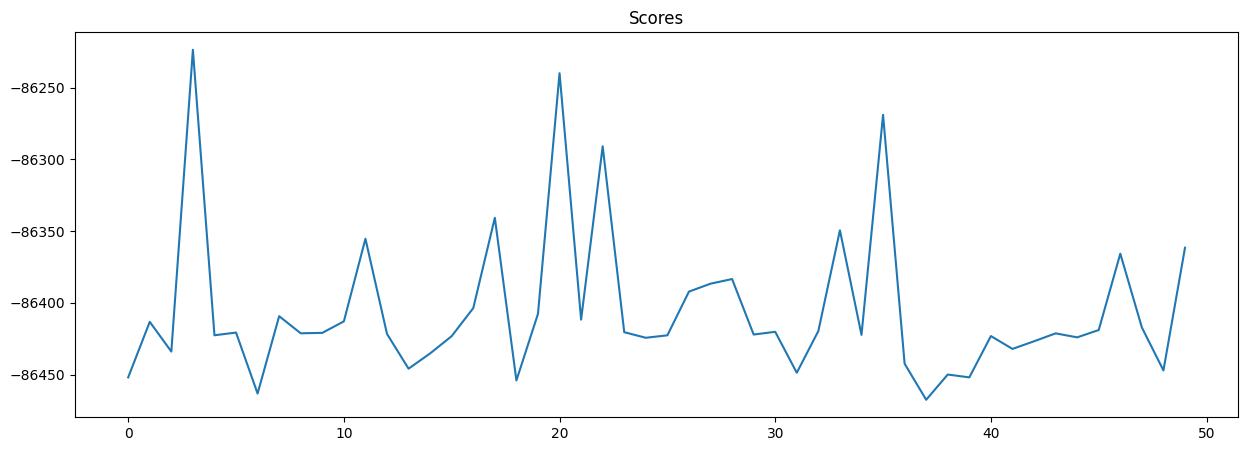

In [778]:
plt.figure(figsize=(15, 5))
plt.plot(scores)
plt.title('Scores')
plt.show()

In [786]:
hidden_states = model.predict(data)

if hidden_states[0] == 0:
    first = "Virat"
else:
    first = "Rohit"

if hidden_states[-1] == 0:
    last = "Virat"
else:
    last = "Rohit"


In [787]:
print("First Player:", first)
print("Last Player:", last)

First Player: Rohit
Last Player: Rohit


In [781]:
transition_matrix = best_model.transmat_
emission_matrix = best_model.emissionprob_
start_probabilities = best_model.startprob_

In [782]:
print("Transition Probability")
print(transition_matrix)

Transition Probability
[[0.83358483 0.16641517]
 [0.21184752 0.78815248]]


In [783]:
print("Emission Probability")
print(emission_matrix)

Emission Probability
[[0.15825924 0.15959481 0.16232815 0.15433726 0.19466896 0.17081158]
 [0.1096946  0.10999032 0.10407144 0.11412748 0.07161704 0.49049911]]


In [784]:
print("Start Probability")
print(start_probabilities)

Start Probability
[0.93966882 0.06033118]


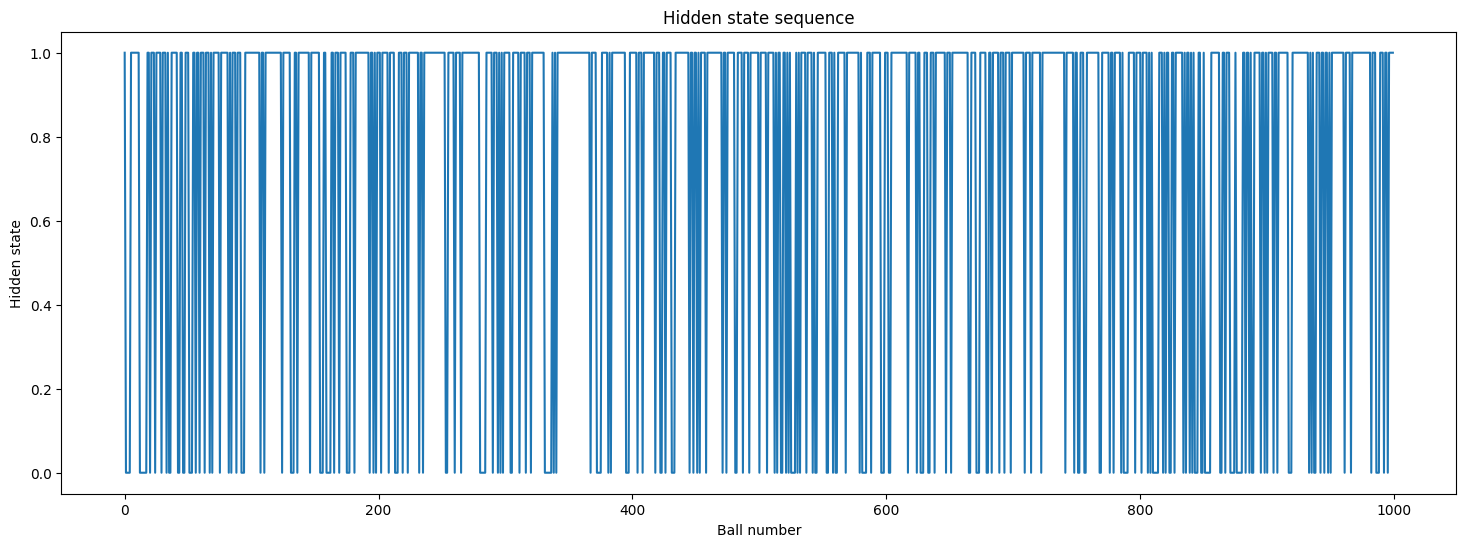

In [785]:
fig, ax = plt.subplots(figsize=(18, 6))

ax.plot(np.arange(1000), hidden_states[:1000])

ax.set_title('Hidden state sequence')
ax.set_xlabel('Ball number')
ax.set_ylabel('Hidden state')
plt.show()